In [93]:
import numpy as np
from scipy import integrate, optimize
import matplotlib.pyplot as plt

For this problem, we will need to consider a differential element of the chain. In the rotating frame, the relevant forces are tension, gravity and the centrifugal force. We will parametrise the shape of the chain, with $x(s)$ representing the vertical coordinate and $r(s)$ representing the radial coordinate, and s representing the distance along the chain.
These variables will be related by the constraint $x'(s)^2 + r'(s)^2 = 1$, which means that a differential increase of x and r along the chain equals a differential increase in s. The tension in the chain will then be $T(s)$, with vertical component $T_x(s) = T(s) x'(s)$ and radial component $T_r(s) = T(s) r'(s)$. We will denote the linear mass density of the chain $\mu$ and its angular velocity about the vertical $\omega$.

Balancing forces along the chain:
In x direction: $T_x'(s) = - \mu\, g$
In r direction: $T_r'(s) = - \mu\, \omega^2\, r(s)$

Solving for $x''(s)$ and $r''(s)$ in terms of $T(s)$ and its derivative, we get:
$$
\begin{align}
x''(s) &= - \frac{\mu\, g + T'(s)\, x'(s)}{T(s)} \\
r''(s) &= - \frac{\mu\, \omega^2\, r(s) + T'(s)\, r'(s)}{T(s)}
\end{align}
$$

Differentiating the constraint equation, and solving for $T'(s)$:
$$
\begin{align}
0 &= x'(s) x''(s) + y'(s) y''(s) \\
\ &= - \frac{r'(s) \left(\mu\, \omega^2\, r(s) + T'(s)\, r'(s) \right) + x'(s) \left(\mu\, g + T'(s)\, x'(s) \right)}{T(s)} \\
\\
T'(s) &= - \mu\, \omega^2\, r(s)\, r'(s) - \mu\, g\, x'(s)
\end{align}
$$

Substituting this into the expressions for $x''(s)$ and $r''(s)$, we can solve these 3 equations as a system of 5 ODEs as a boundary value problem. The boundary conditions are $x(0) = 0$, $r(0) = 0$, $T(l) = 0$ and $x'(0)$ is free to ensure that the last condition is met. However, we do not have enough boundary conditions for an exact solution. So, we need 1 more.

We will do this by integrating the force balance along x:
$$
\begin{align}
\int_{0}^{l} T_x'(s)\, ds &= \int_{0}^{l} - \mu\, g\, ds \\
T_x(l) - T_x(0) &= -\mu\, g\, l \\
T(0)\,x'(0) &= \mu\, g\, l \\
T(0) &= \frac{\mu\, g\, l}{x'(0)}
\end{align}
$$

Thus, we solve this as a boundary value problem with $x(0) = 0$, $r(0) = 0$, $x'(0)^2 + r'(0)^2 = 1$, $T(0) = \frac{\mu\, g\, l}{x'(0)}$, $T(l) = 0$

In [89]:
g = 9.81
mu = 0.1
omega = 10
l = 1

epsilon = 10E-5

def swinging_chain(s, vec):
    x, xp, r, rp, T = vec

    Tp = - mu * np.power(omega, 2) * r * rp - mu * g * xp

    return [
        xp,
        - (mu * g + Tp * xp) / T,
        rp,
        - (mu * np.power(omega, 2) * r + Tp * rp) / T,
        Tp
    ]

def bc(ya, yb):
    return [
        ya[0],
        ya[2],
        np.power(ya[1], 2) + np.power(ya[3], 2) - 1,
        ya[1] * ya[4] - mu * g * l,
        yb[4] - epsilon
    ]

s_values = np.linspace(0, l, 50)
initial_values = np.array([
    np.zeros(50),
    np.ones(50),
    np.zeros(50),
    np.zeros(50),
    np.concatenate([np.ones(25) * mu * g * l, np.ones(25) * epsilon])
])

sol = integrate.solve_bvp(swinging_chain, bc, s_values, initial_values)

C:\Users\kaloo\AppData\Local\Temp\ipykernel_5432\3272882904.py:15: RuntimeWarning: divide by zero encountered in divide
  - (mu * g + Tp * xp) / T,
C:\Users\kaloo\AppData\Local\Temp\ipykernel_5432\3272882904.py:17: RuntimeWarning: divide by zero encountered in divide
  - (mu * np.power(omega, 2) * r + Tp * rp) / T,
C:\Users\kaloo\AppData\Roaming\Python\Python39\site-packages\scipy\integrate\_bvp.py:311: RuntimeWarning: invalid value encountered in add
  col_res = y[:, 1:] - y[:, :-1] - h / 6 * (f[:, :-1] + f[:, 1:] +
C:\Users\kaloo\AppData\Roaming\Python\Python39\site-packages\scipy\integrate\_bvp.py:40: RuntimeWarning: invalid value encountered in subtract
  df_dy[:, i, :] = (f_new - f0) / hi
C:\Users\kaloo\AppData\Roaming\Python\Python39\site-packages\scipy\integrate\_bvp.py:38: RuntimeWarning: invalid value encountered in subtract
  hi = y_new[i] - y[i]
C:\Users\kaloo\AppData\Roaming\Python\Python39\site-packages\scipy\integrate\_bvp.py:566: RuntimeWarning: invalid value encountered

In [147]:
def swinging_chain(s, vec, mu, omega, g):
    x, xp, r, rp, T = vec

    Tp = - mu * np.power(omega, 2) * r * rp - mu * g * xp

    return [
        xp,
        - (mu * g + Tp * xp) / T,
        rp,
        - (mu * np.power(omega, 2) * r + Tp * rp) / T,
        Tp
    ]

g = 9.81
mu = 0.01
omega = 40
l = 1

# xdo_values = np.linspace(0.05, 1, 100)

def Tf(xdo):
    print(xdo)

    sol = integrate.solve_ivp(swinging_chain, [0, l], [0, xdo, 0, np.sqrt(1 - np.power(xdo, 2)), mu * g * l / xdo], args=[mu, omega, g], max_step = 0.005)

    return sol.y[4, -1] * sol.y[3, -1]

# Tf_values = np.array([Tf(xdo) for xdo in xdo_values])

In [144]:
sol = optimize.root_scalar(Tf, method="secant", x0=0.1, x1=0.2, bracket=(0.01, 0.9), rtol=0.01)

In [149]:
initial_values = np.linspace(0.01, 0.9, 100)

xdo_sols = [optimize.root_scalar(Tf, method="secant", x0=xdo_i, x1=xdo_i + 0.001, bracket=(0.01, 0.9), rtol=0.01) for xdo_i in initial_values]
print(xdo_sols)

0.01
0.011
0.012029284807158556
0.01221918163342207
0.01898989898989899
0.01998989898989899
0.0010574750444214823
0.019481310905373656
0.01899857482908008
0.0020718894121218565
0.018095510318449633
0.01729163283012558
0.006998580907323143
0.014794064564804131
0.013461412530098605
0.01184810642730465
0.01231840403756432
0.02797979797979798
0.02897979797979798
0.47167123291362306
0.4931933739153851
0.5359419578083875
0.5304017511841039
0.03696969696969697
0.03796969696969697
0.10741460881125632
0.10907651970575537
0.045959595959595964
0.046959595959595965
0.09790020529917827
0.10661745095530625
0.10955289935069802
0.054949494949494956
0.05594949494949496
0.0985925363063614
0.10709526506257827
0.10958698873257934
0.06393939393939393
0.06493939393939394
0.10119819022436478
0.10799490655649693
0.10965326768517533
0.07292929292929293
0.07392929292929293
0.10397780687488535
0.10877133360918356
0.08191919191919192
0.08291919191919192
0.10639236740224665
0.10930094848152862
0.09090909090909091


C:\Users\kaloo\AppData\Local\Temp\ipykernel_5432\2589357100.py:24: RuntimeWarning: invalid value encountered in sqrt
  sol = integrate.solve_ivp(swinging_chain, [0, l], [0, xdo, 0, np.sqrt(1 - np.power(xdo, 2)), mu * g * l / xdo], args=[mu, omega, g], max_step = 0.005)


KeyboardInterrupt: 

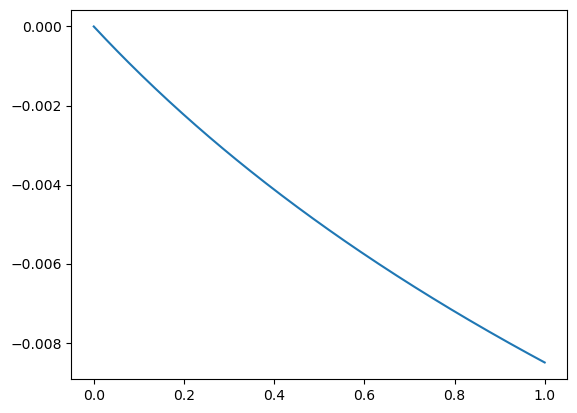

In [114]:
plt.plot(sol.y[2], -sol.y[0])
plt.show()